In [13]:
import numpy as np

# variables
sampling_frequency = int(10e7)
nyquist_frequency = sampling_frequency / 2

time_interval = 1e-3
t = np.arange(0, time_interval, 1 / sampling_frequency)

modulation_frequency = 20e3# 1/s
carrier_frequency = 2e6 # 1/s
k = 25 # sensitivity

#### FM definition Wikipedia:

$$ FM(t) = A_c \cos\left(\omega_c t + \int_0^t \omega_{\Delta} x_m(t')dt'\right)$$ 

If the modulation signal consists of only a single frequency, this simplifies to 

$$ FM(t) = A_c \cos\left(\omega_c t + \frac{\omega_{\Delta}}{\omega_m}\sin(\omega_m t)\right)$$

Defining modulation depth paramter $k = \omega_{\Delta}/\omega_m$ (dimensionless) finally leaves

$$ FM(t) = A_c \cos\left(\omega_c t + k\sin(\omega_m t)\right)$$

Acoording to https://www.johndcook.com/blog/2016/02/17/analyzing-an-fm-signal/, this result can be fourier expanded. Using Fourier notation, it is clear that the results consists of a superposition of frequencies with prefactor $J_j(k)$ or $\beta$ is the modulation index here:

$$FM(t) = \sum_{j=-\infty}^{\infty} J_j(\beta) \cos\left[(\omega_c+j f_m)t\right]$$

In [14]:
# carrier signal
phi = 2 * np.pi * carrier_frequency * t + k * np.sin(2 * np.pi * modulation_frequency * t)
FM = np.cos(phi)

In [15]:
# now we will compute the fourier transform of the signal
from scipy.fft import fft,fftfreq

In [16]:
# samples
N = int(sampling_frequency * time_interval)
T = time_interval / N

# fourier coordinates
Y = fft(FM)
xf = fftfreq(N, T)[:N // 2]

(1250000.0, 2750000.0)

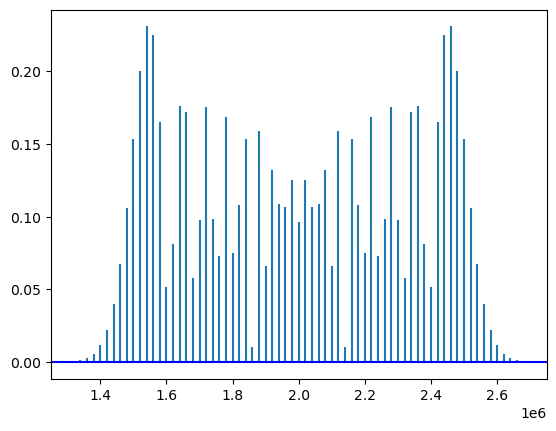

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.stem(xf, 2.0 / N * np.abs(Y[0 : N // 2]), markerfmt = " ", basefmt = "b")
ax.set_xlim(carrier_frequency - 1.5 * k * modulation_frequency, carrier_frequency + 1.5 * k * modulation_frequency)

To check we compare the result to $\sum_{j=-\infty}^{\infty} J_j(\beta) \cos\left[(\omega_c+j f_m)t\right]$. The pre-factors are thus $|J_j(\beta)|$, Bessel function of the first kind

<StemContainer object of 3 artists>

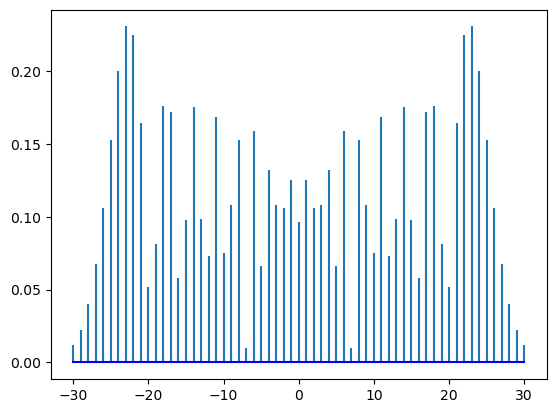

In [35]:
from scipy.special import jv

def bessel_function_firstkind(order, index):
    return jv(order, index)

# initialize empty matrices
indices = np.linspace(- k -5, k + 5, 2 * k + 11)

amplitude_array = bessel_function_firstkind(indices, k)

fig, ax = plt.subplots()
ax.stem(indices, abs(amplitude_array), markerfmt = " ", basefmt = "b")
